In [84]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np
from scipy.stats import linregress

In [43]:
df = pd.read_csv(r'C:\Users\thoma\Documents\Data Analysis Project\StudentPerformanceFactors.csv')

In [32]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [41]:
df_null = df.isnull().sum()

In [40]:
#drop rows with any missing values 
df_dropna = df.dropna()
df

Hours_Studied                0
Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64

In [45]:
df_drop_duplicates= df.drop_duplicates()
df_drop_duplicates

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [44]:
unique_counts = df.nunique() #checking specific 
unique_counts

Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
Exam_Score                    45
dtype: int64

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


Hours_Studied
1       3
2       6
3      12
4      17
5      21
6      17
7      51
8      58
9      86
10     94
11    146
12    192
13    218
14    269
15    315
16    351
17    381
18    401
19    441
20    465
21    431
22    402
23    411
24    357
25    289
26    263
27    229
28    171
29    134
30    123
31     77
32     54
33     40
34     29
35     20
36     11
37      6
38      7
39      7
43      1
44      1
dtype: int64

# Data Visualization
 Understanding Overall Performance:
<li>	How is the overall distribution of exam scores?


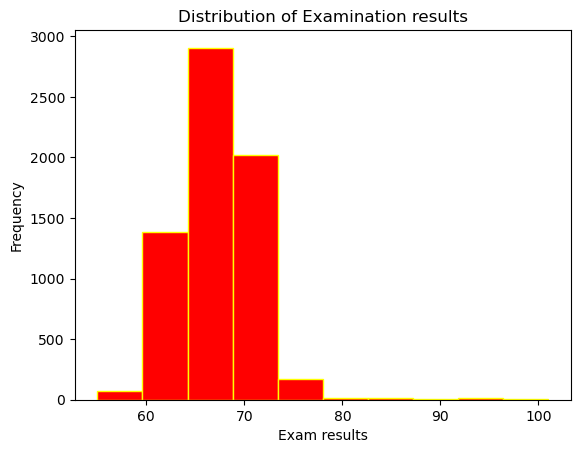

In [61]:
#plt.figure(figsize=(2,4))
plt.hist(df['Exam_Score'], bins = 10, color = 'red', edgecolor = 'yellow')
plt.title('Distribution of Examination results')
plt.xlabel('Exam results')
plt.ylabel('Frequency')
plt.show()

<li>	What are the summary statistics for exam scores (mean, median, mode, range)?

C:\Users\thoma\AppData\Local\Temp\ipykernel_18052\4082332245.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Parental_Education_Level', y='Exam_Score', data=df, palette='viridis')


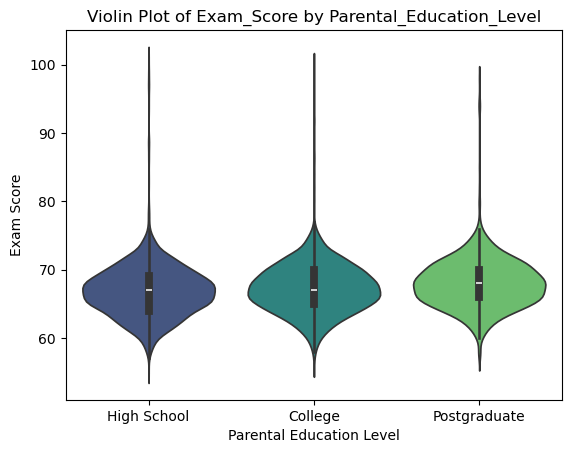

In [69]:
#plt.figure(figsize=(10, 6))
sns.violinplot(x='Parental_Education_Level', y='Exam_Score', data=df, palette='viridis')
plt.title('Violin Plot of Exam_Score by Parental_Education_Level')
plt.xlabel('Parental Education Level')
plt.ylabel('Exam Score')
plt.show()


In [64]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


#Study Habits and Academic Performance:
<li>	How does the number of hours studied per week correlate with exam scores?


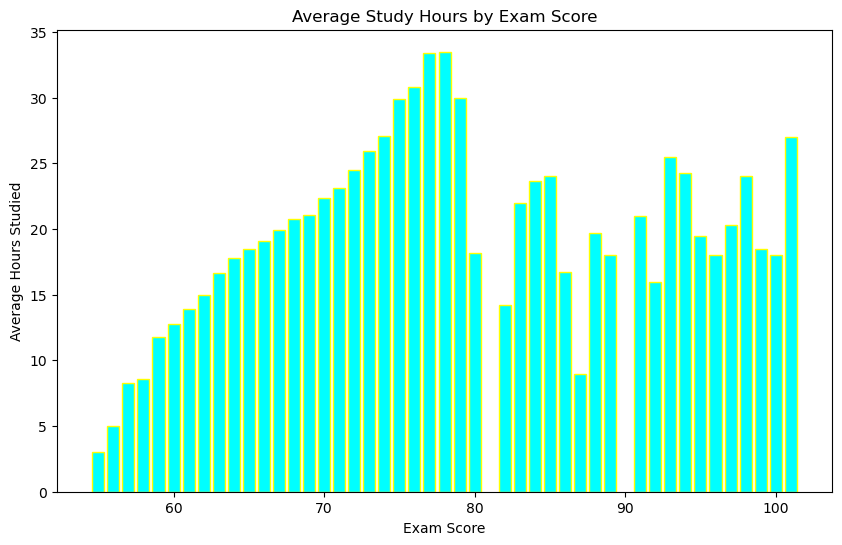

In [75]:
# Grouping data by 'Exam_Score' and calculating the mean 'Hours_Studied'
grouped_data = df.groupby('Exam_Score')['Hours_Studied'].mean()

# Creating a bar chart
plt.figure(figsize=(10, 6))  
plt.bar(grouped_data.index, grouped_data, color='aqua', edgecolor='yellow')
plt.title('Average Study Hours by Exam Score')
plt.xlabel('Exam Score')
plt.ylabel('Average Hours Studied')
plt.show()


<Axes: xlabel='Exam_Score', ylabel='Hours_Studied'>

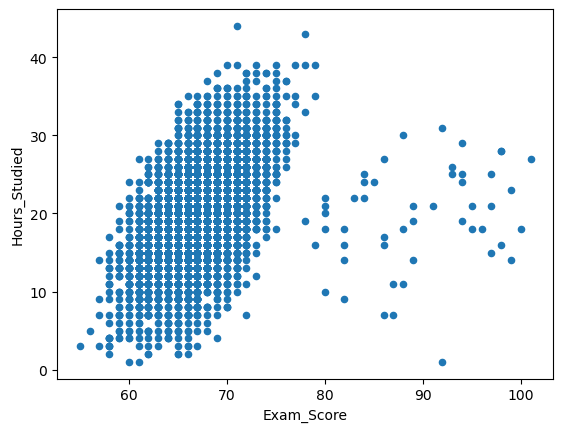

In [79]:
df.plot(kind='scatter', x='Exam_Score', y='Hours_Studied')

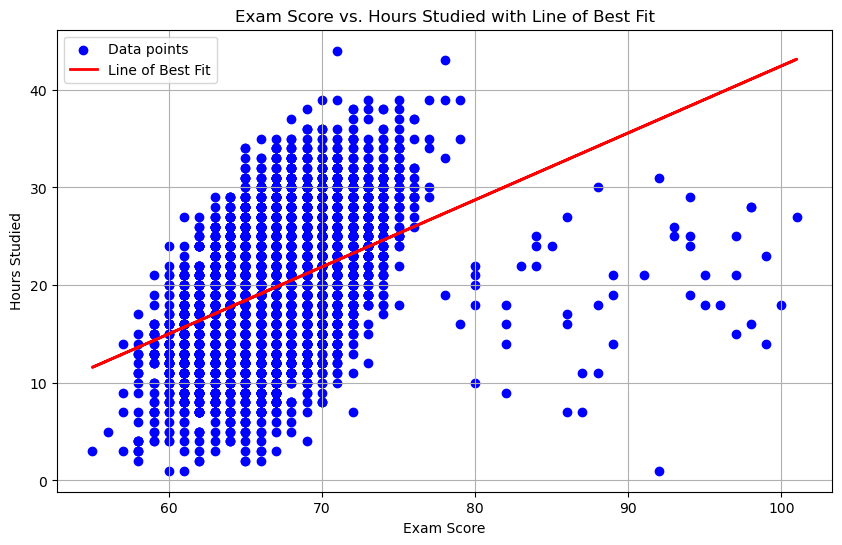

In [87]:


# Extract data for plotting
x = df['Exam_Score']
y = df['Hours_Studied']

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line_of_best_fit = slope * x + intercept

# Plot the data and the line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, line_of_best_fit, color='red', linestyle='-', linewidth=2, label='Line of Best Fit')
plt.title('Exam Score vs. Hours Studied with Line of Best Fit')
plt.xlabel('Exam Score')
plt.ylabel('Hours Studied')
plt.legend()
plt.grid(True)
plt.show()

